In [81]:
import numpy as np
import torch as T
from app.APN.model.Network import network
from app.APN.model.ConcreteNetwork import network as conetwork
from app.APN.model.PostNetwork import post_network

# path = '/Users/jahan/CardiacFlask/app/APN/model/saved/final-GVI.pt'
path = './app/APN/model/saved/checkpoint.pt'
# path = '/Users/jahan/CardiacFlask/app/APN/model/saved/final-PN.pt'

state_dict = T.load(path, map_location="cpu")

model = conetwork(
    41,
    8,
    16,
)

# model = post_network(
#     41,
#     8,
#     4,
#     d_l=4,
# )

model.load_state_dict(state_dict)
model.eval()
print(model.x_attn)

Please check your arguments if you have upgraded adabelief-pytorch from version 0.0.5.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  ---------
adabelief-pytorch=0.0.5  1e-08  False              False
>=0.1.0 (Current 0.2.0)  1e-16  True               True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended eps = 1e-8                                      Recommended eps = 1e-16
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.

Weight decoupling enabled in AdaBelief
Rectification enabled in AdaBelief


RuntimeError: Error(s) in loading state_dict for network:
	size mismatch for xattn.q.0.weight: copying a param with shape torch.Size([32, 16]) from checkpoint, the shape in current model is torch.Size([32, 32]).

In [82]:
print(T.sigmoid(model.p_logit))
print(list(X))

tensor([[[0.4879],
         [0.4941],
         [0.4943],
         [0.4947],
         [0.4962],
         [0.4939],
         [0.4949],
         [0.4971],
         [0.4987],
         [0.4950],
         [0.4935],
         [0.4951],
         [0.4899],
         [0.4944],
         [0.4954],
         [0.4956],
         [0.4933],
         [0.4909],
         [0.4917],
         [0.4946],
         [0.4885],
         [0.4864],
         [0.4792],
         [0.4898],
         [0.4968],
         [0.4835],
         [0.4812],
         [0.4927],
         [0.4994],
         [0.4993],
         [0.4989],
         [0.4999],
         [0.4875],
         [0.4685],
         [0.4622],
         [0.4830],
         [0.4874],
         [0.4856],
         [0.4419],
         [0.3835],
         [0.4145]],

        [[0.4879],
         [0.4941],
         [0.4943],
         [0.4947],
         [0.4962],
         [0.4939],
         [0.4949],
         [0.4971],
         [0.4987],
         [0.4950],
         [0.4935],
         [

In [83]:
import pandas as pd
import torch.nn.functional as F

X = pd.read_csv("X.csv", index_col=False)
listing = []
values = T.sigmoid(model.p_logit[1,:,:]).detach().numpy().flatten()
for i, l in enumerate(list(X)):
    temp = (l, values.flatten()[i])
    listing.append(temp)
listing.sort(key=lambda x: x[1])
listing

[('VENT', 0.38352677),
 ('DRAIN_4', 0.41452214),
 ('ICU', 0.44193542),
 ('PRECR', 0.46223935),
 ('PERF', 0.46847516),
 ('EF_EST', 0.47922772),
 ('STAT', 0.48124436),
 ('eGFR', 0.48295063),
 ('NYHA', 0.48347402),
 ('MINHT', 0.4856252),
 ('EF', 0.4864396),
 ('HG', 0.48743883),
 ('CCT', 0.48748836),
 ('AGE', 0.487877),
 ('CHF_C', 0.48854473),
 ('SHOCK', 0.48983365),
 ('HYT', 0.48992124),
 ('DIAL', 0.49085402),
 ('TRANS', 0.49165496),
 ('TP', 0.4926834),
 ('CHF', 0.49326265),
 ('DB_CON', 0.49351823),
 ('POP', 0.49392664),
 ('Sex', 0.4940797),
 ('BMI', 0.49427006),
 ('LD_T', 0.49440488),
 ('PROCNO', 0.4946006),
 ('Race1', 0.4947104),
 ('ARRT', 0.4948728),
 ('DB', 0.49497077),
 ('HCHOL', 0.4951423),
 ('CBVD_T', 0.49537677),
 ('PVD', 0.49557373),
 ('Insur', 0.4961805),
 ('IE_T', 0.4968323),
 ('SMO_H', 0.4970956),
 ('SMO_C', 0.4986935),
 ('TRICUS', 0.49890307),
 ('MITRAL', 0.49933854),
 ('AORTIC', 0.4994168),
 ('PULM', 0.49985507)]

In [3]:
import pandas as pd
X = pd.read_csv("X.csv", index_col=False)
listing = []
values = (F.softplus(model.scaling[:, -1, :] + 1)).detach().numpy()
for i, l in enumerate(list(X)):
    temp = (l, values.flatten()[i])
    listing.append(temp)
listing.sort(key=lambda x: x[1])
listing

[('AORTIC', 0.0040727993),
 ('DIAL', 0.007878384),
 ('PROCNO', 0.03878734),
 ('HCHOL', 0.039977983),
 ('Insur', 0.042214036),
 ('Race1', 0.047178715),
 ('IE_T', 0.061705552),
 ('BMI', 0.06386757),
 ('DB', 0.06404322),
 ('SMO_H', 0.071638234),
 ('CHF', 0.08609039),
 ('CBVD_T', 0.10663623),
 ('CHF_C', 0.10918364),
 ('SHOCK', 0.111626305),
 ('POP', 0.11188501),
 ('SMO_C', 0.12132651),
 ('PVD', 0.12180781),
 ('PRECR', 0.12359293),
 ('NYHA', 0.12407612),
 ('CCT', 0.138822),
 ('ARRT', 0.14004211),
 ('Sex', 0.14131975),
 ('EF_EST', 0.16626546),
 ('TP', 0.16686139),
 ('LD_T', 0.1728289),
 ('eGFR', 0.21038802),
 ('TRICUS', 0.21290627),
 ('MITRAL', 0.24992),
 ('STAT', 0.25732237),
 ('TRANS', 0.26683882),
 ('HYT', 0.2864041),
 ('DB_CON', 0.29348895),
 ('PERF', 0.3208454),
 ('VENT', 0.41225913),
 ('ICU', 0.42303023),
 ('EF', 0.43474954),
 ('AGE', 0.47864357),
 ('DRAIN_4', 0.5122524),
 ('MINHT', 0.5574597),
 ('HG', 1.0492992),
 ('PULM', 2.3579814)]

In [15]:
model.xmap.requires_grad_(False)

mapping(
  (W): ParameterList(
      (0): Parameter containing: [torch.FloatTensor of size 1x41x1x10]
      (1): Parameter containing: [torch.FloatTensor of size 1x41x10x10]
      (2): Parameter containing: [torch.FloatTensor of size 1x41x10x10]
      (3): Parameter containing: [torch.FloatTensor of size 1x41x10x10]
      (4): Parameter containing: [torch.FloatTensor of size 1x41x10x16]
  )
  (b): ParameterList(
      (0): Parameter containing: [torch.FloatTensor of size 1x41x1x10]
      (1): Parameter containing: [torch.FloatTensor of size 1x41x1x10]
      (2): Parameter containing: [torch.FloatTensor of size 1x41x1x10]
      (3): Parameter containing: [torch.FloatTensor of size 1x41x1x10]
      (4): Parameter containing: [torch.FloatTensor of size 1x41x1x16]
  )
)

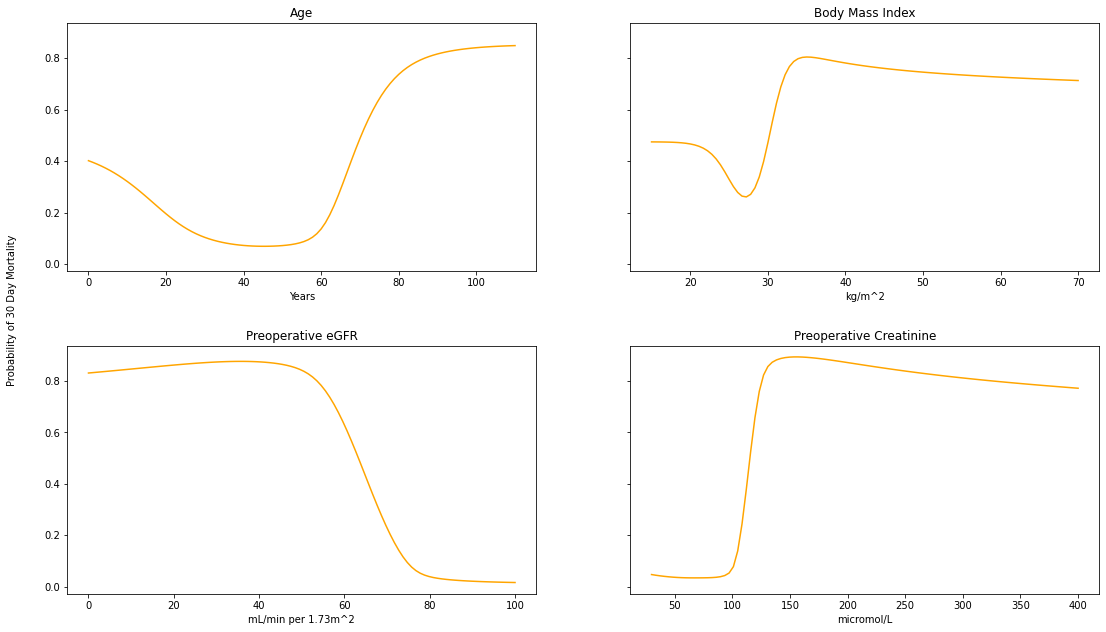

In [4]:
import matplotlib.pyplot as plt

age_idx = 0
bmi_idx = 2
egfr_idx = 35
precr_idx = 34
array_len = 41

age_x = np.linspace(0, 110, 100)
age = T.ones(size=(100, array_len)) * -1
age[:, age_idx] *= -age_x

bmi_x = np.linspace(15, 70, 100)
bmi = T.ones(size=(100, array_len)) * -1
bmi[:, bmi_idx] *= -bmi_x

egfr_x = np.linspace(0, 100, 100)
egfr = T.ones(size=(100, array_len)) * -1
egfr[:, egfr_idx] *= -egfr_x

precr_x = np.linspace(30, 400, 100)
precr = T.ones(size=(100, array_len)) * -1
precr[:, precr_idx] *= -precr_x

model.sample = False
scaled_prob, probs, N, a = model(xv=age)
p_age1 = scaled_prob[:, -1].cpu().detach().numpy().flatten()
p_age2 = probs[:, -1, age_idx].cpu().detach().numpy().flatten()

scaled_prob, probs, N, a = model(xv=bmi)
p_bmi1 = scaled_prob[:, -1].cpu().detach().numpy().flatten()
p_bmi2 = probs[:, -1, bmi_idx].cpu().detach().numpy().flatten()

scaled_prob, probs, N, a = model(xv=egfr)
p_egfr1 = scaled_prob[:, -1].cpu().detach().numpy().flatten()
p_egfr2 = probs[:, -1, egfr_idx].cpu().detach().numpy().flatten()

scaled_prob, probs, N, a = model(xv=precr)
p_precr1 = scaled_prob[:, -1].cpu().detach().numpy().flatten()
p_precr2 = probs[:, -1, precr_idx].cpu().detach().numpy().flatten()

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=True, figsize=(10, 10))
fig.set_size_inches(18.5, 10.5)
fig.text(0.08, 0.5, 'Probability of 30 Day Mortality', va='center', rotation='vertical')

# add age
# ax[0][0].plot(age_x, p_age1, color='blue')  # main output
ax[0][0].plot(age_x, p_age2, color='orange')  # aux output
ax[0][0].set_title("Age")
ax[0][0].set_xlabel('Years')
# ax.plot(age_x, p2, color='orange')  # aux output

# ax[0][1].plot(bmi_x, p_bmi1, color='blue')  # main output
ax[0][1].plot(bmi_x, p_bmi2, color='orange')  # aux output
ax[0][1].set_title("Body Mass Index")
ax[0][1].set_xlabel('kg/m^2')


# ax[1][0].plot(egfr_x, p_egfr1, color='blue')  # main output
ax[1][0].plot(egfr_x, p_egfr2, color='orange')  # aux output
ax[1][0].set_title("Preoperative eGFR")
ax[1][0].set_xlabel('mL/min per 1.73m^2')

# ax[1][1].plot(precr_x, p_precr1, color='blue')  # main output
ax[1][1].plot(precr_x, p_precr2, color='orange')  # aux output
ax[1][1].set_title("Preoperative Creatinine")
ax[1][1].set_xlabel('micromol/L')

plt.subplots_adjust(hspace=0.3)

fig.savefig('figure3.jpg', format='jpeg', dpi=600)

In [3]:
import pandas as pd

df = pd.read_csv('X_ev.csv')
ev = df.values
ev[np.isnan(ev)] = -1
ev.shape

data = T.from_numpy(ev.astype(np.float32))
single_prob, probs, N, (attn, attn_x, beta_params) = model(xv=data)
print(single_prob.shape)
p_mort = single_prob[:,-1].cpu().detach().numpy().flatten()
print(np.min(p_mort), np.max(p_mort))
print(np.argmin(p_mort), np.argmax(p_mort))

xmin = np.argmin(np.abs(p_mort - 0.1))
xmax = np.argmin(np.abs(p_mort - 0.85))
xmid = np.argmin(np.abs(p_mort - 0.5))
mask = ev[xmin, :] != -1

probs_min = probs[xmin, :, :].double().cpu().detach().numpy()[:, mask] * 100
p_min = single_prob[xmin, :].double().cpu().detach().numpy() * 100
direction_min = np.sign(probs_min - 50)
attn_min = attn[xmin, :, :].cpu().detach().numpy()[:, mask] * direction_min

probs_max = probs[xmax, :, :].double().cpu().detach().numpy()[:, mask] * 100
p_max = single_prob[xmax, :].double().cpu().detach().numpy() * 100
direction_max = np.sign(probs_max - 50)
attn_max = attn[xmax, :, :].cpu().detach().numpy()[:, mask] * direction_max

probs_mid = probs[xmid, :, :].double().cpu().detach().numpy()[:, mask] * 100
p_mid = single_prob[xmid, :].double().cpu().detach().numpy() * 100
direction_mid = np.sign(probs_mid - 50)
attn_mid = attn[xmid, :, :].cpu().detach().numpy()[:, mask] * direction_mid

min_values = [(l, v) for (l, v) in zip(list(df), ev[xmin, :]) if v != -1]
max_values = [(l, v) for (l, v) in zip(list(df), ev[xmax, :]) if v != -1]
mid_values = [(l, v) for (l, v) in zip(list(df), ev[xmid, :]) if v != -1]
print(p_mort[xmin], min_values)
print(p_mort[xmax], max_values)
print(p_mort[xmid], mid_values)

torch.Size([7343, 8])
0.15911049 0.9170785
4928 4749
0.15911049 [('AGE', 51.0), ('Sex', 1.0), ('BMI', 25.414788483897954), ('Insur', 1.0), ('ARRT', 0.0), ('SMO_H', 0.0), ('DB', 0.0), ('HCHOL', 0.0), ('HYT', 0.0), ('PVD', 0.0), ('CHF', 0.0), ('TP', 1.0), ('PRECR', 53.052), ('ICU', 43.0488)]
0.8498931 [('AGE', 86.0), ('Sex', 1.0), ('BMI', 23.185845188258423), ('Insur', 3.0), ('ARRT', 1.0), ('SMO_H', 0.0), ('DB', 0.0), ('HCHOL', 0.0), ('HYT', 0.0), ('PVD', 0.0), ('CHF', 0.0), ('TP', 2.0), ('PRECR', 106.104), ('ICU', 316.632)]
0.49999443 [('AGE', 61.0), ('Sex', 1.0), ('BMI', 20.94598783792162), ('Insur', 1.0), ('ARRT', 0.0), ('SMO_H', 0.0), ('DB', 0.0), ('HCHOL', 0.0), ('HYT', 0.0), ('PVD', 0.0), ('CHF', 1.0), ('TP', 1.0), ('PRECR', 61.894), ('ICU', 146.3088)]


In [53]:
import json
with open('./app/static/feature_list.json', 'r') as file:
    data_dict = json.load(file)
file.close()
xcolname = np.array([d["name"] for d in data_dict])[mask]
xcolname

array(['Age (years)', 'Sex', 'Body Mass Index', 'Insurance',
       'History of Arrhythmia', 'History of Smoking',
       'History of Diabetes', 'History of Hypercholesterolaemia',
       'History of Hypertension',
       'History of Peripheral Vascular Disease',
       'History of Heart Failure', 'Type of Operation',
       'Preoperative Creatinine (micromol/L)', 'Hours in ICU'],
      dtype='<U45')

In [46]:
import colorcet as cc
import numpy as np
# from scipy.stats.kde import gaussian_kde
import pandas as pd
from bokeh.models import BasicTicker, ColorBar,\
    LinearColorMapper, PrintfTickFormatter
from bokeh.plotting import figure, show
from bokeh.embed import components

ycolname = np.array([
        'Readmission to ICU', 'Reintubation', 'Return to Theatre',
        'Postoperative Kidney Injury', 'Postoperative Haemofiltration',
        'New Postoperative Arrhythmia', 'Deep Sternal Wound Infection',
        '30 Day Mortality'
        ])




def plot_heatmap(attn, probs, p, X, xcolname, ycolname):
    data = pd.DataFrame(attn*100, index=ycolname, columns=xcolname)
    prob_value = pd.DataFrame(probs, index=ycolname, columns=xcolname)
    x_value = pd.DataFrame(
        np.vstack([X for _ in range(len(ycolname))]),
        index=ycolname, columns=xcolname)
    data.columns.name = "Features"
    data.index.name = "Outcomes"
    df = pd.DataFrame(data.stack(), columns=['attention']).reset_index()
    df_prob = pd.DataFrame(prob_value.stack(), columns=['probs']).reset_index()
    df_x = pd.DataFrame(x_value.stack(), columns=['X']).reset_index()
    df['probs'] = df_prob.probs
    df['x'] = df_x.X
    colors = cc.CET_D1  # [10:-30]
    r = df.attention.abs().max()
    mapper = LinearColorMapper(palette=colors, low=-r, high=r)

    TOOLS = "hover,save"

    width = len(xcolname)
    height = len(ycolname)

    p = figure(
        title="",
        x_range=xcolname, y_range=ycolname,
        x_axis_location="above", plot_width=400 + width*30,
        plot_height=300 + height*20,
        min_border_right=200, min_border_left=200,
        tools=TOOLS, toolbar_location='below',
        tooltips=[
            ('Outcome', '@Outcomes'),
            ('Feature', '@Features'),
            ('Value', '@x'),
            ('Probability', '@probs%'),
            ('Attention', '@attention%'),
            ])

    p.grid.grid_line_color = None
    p.axis.axis_line_color = None
    p.axis.major_tick_line_color = None
    p.axis.major_label_text_font_size = "12px"
    p.axis.major_label_standoff = 0
    p.xaxis.major_label_orientation = np.pi / 3

    p.rect(
        x="Features", y="Outcomes", width=1, height=1,
        source=df,
        fill_color={'field': 'attention', 'transform': mapper},
        line_color=None)

    color_bar = ColorBar(
        color_mapper=mapper, major_label_text_font_size="12px",
        ticker=BasicTicker(desired_num_ticks=4),
        formatter=PrintfTickFormatter(format="%d%%"),
        label_standoff=6, border_line_color=None, location=(0, 0))

    p.add_layout(color_bar, 'right')
    show(p)

In [54]:
plot_heatmap(attn_min, probs_min, p_min, ev[xmin, mask], xcolname, ycolname)

In [55]:
plot_heatmap(attn_max, probs_max, p_max, ev[xmax, mask], xcolname, ycolname)

In [56]:
plot_heatmap(attn_mid, probs_mid, p_mid, ev[xmid, mask], xcolname, ycolname)

In [59]:
with open('metadata.tsv', "w") as f:
    for subwords in [d["name"] for d in data_dict]:
        f.write("{}\n".format(subwords))
f.close()

In [70]:
feat_embed = model.x_attn.double().cpu().detach().numpy()[0, :, :16]
feat_embed.shape

with open('embed.tsv', "w") as f:
    for vec in feat_embed:
        for v in vec:
            f.write("{}\t".format(v))
        f.write("\n")
f.close()

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(num=1, figsize=(15,15), dpi=800)
ax.set_axis_off() # toggle visible axes

col1 = 0.28
col2 = 0.7
col3 = 0.49
col4 = 0.595

rowfs = 0.8
rowdc = 0.55

# first box
ax.annotate(
    ('ANZSCTS Database:\n' + 
     '153932 database records (operations) \n' + 
     '151078 unique patients \n' +
     'All assessed for eligibility'),
    fontsize = 12,
    family = 'sans serif',
    xy = (col1,0.83), # for arrow end
    xytext = (col1,0.92),
    va = 'center',
    ha = 'center',
    ma = 'left',
#     usetex = True,
    arrowprops = {'arrowstyle':'->'},
    bbox = {'boxstyle':'square','facecolor':'white', 'alpha':0.9}
)

ax.annotate(
    ('MIMIC III Database:\n' + 
     '53423 database records (ICU Admissions) \n' + 
     '38597 unique patients \n' +
     'All assessed for eligibility'),
    fontsize = 12,
    family = 'sans serif',
    xy = (col2,0.835), # for arrow end
    xytext = (col2,0.92),
    va = 'center',
    ha = 'center',
    ma = 'left',
#     usetex = True,
    arrowprops = {'arrowstyle':'->'},
    bbox = {'boxstyle':'square','facecolor':'white', 'alpha':0.9}
)


### first blue box
ax.annotate(
    ('Feature Selection:\n' + 
    '41 preoperative, intra-operative,\n' +
    'and early post-operative variables') ,
    fontsize = 12,
    family = 'sans serif',
    xy = (col1,0.685), # for arrow end
    xytext = (col1,rowfs),
    va = 'center',
    ha = 'center',
    ma = 'left',
    arrowprops = {'arrowstyle':'->'},
    bbox = {'boxstyle':'round','facecolor':'blue', 'alpha':0.2}
)

ax.annotate(
    ('Feature Selection:\n' + 
    '41 preoperative, intra-operative,\n' +
    'and early post-operative variables') ,
    fontsize = 12,
    family = 'sans serif',
    xy = (col3,0.685), # for arrow end
    xytext = (col1,rowfs),
    va = 'center',
    ha = 'center',
    ma = 'left',
    arrowprops = {'arrowstyle':'->'},
    bbox = {'boxstyle':'round','facecolor':'blue', 'alpha':0.2}
)

ax.annotate(
    ('Feature and Cardiac Surgery Selection:\n' + 
    '14 preoperative, operative,\n' +
    'and early post-operative variables\n' +
    '8393 cardiac surgery ICU admissions'),
    fontsize = 12,
    family = 'sans serif',
    xy = (col2,0.685), # for arrow end
    xytext = (col2,rowfs),
    va = 'center',
    ha = 'center',
    ma = 'left',
    arrowprops = {'arrowstyle':'->'},
    bbox = {'boxstyle':'round','facecolor':'blue', 'alpha':0.2}
)

ax.annotate(
    ('Feature and Cardiac Surgery Selection:\n' + 
    '14 preoperative, operative,\n' +
    'and early post-operative variables\n' +
    '8393 cardiac surgery ICU admissions'
    ) ,
    fontsize = 12,
    family = 'sans serif',
    xy = (col3,0.685), # for arrow end
    xytext = (col2,rowfs),
    va = 'center',
    ha = 'center',
    ma = 'left',
    arrowprops = {'arrowstyle':'-',  'linestyle':':'},
    bbox = {'boxstyle':'round','facecolor':'blue', 'alpha':0.2}
)

# feature selection summary
ax.annotate(
    ('MIMIC III Dataset'),
    fontsize = 12,
    family = 'sans serif',
    xy = (col2,0.56), # for arrow end
    xytext = (col2,0.68),
    va = 'top',
    ha = 'center',
    ma = 'left',
#     usetex = True,
    arrowprops = {'arrowstyle':'->'},
    bbox = {'boxstyle':'square','facecolor':'white', 'alpha':0.9}
)

ax.annotate(
    ('ANZSCTS Full Dataset'),
    fontsize = 12,
    family = 'sans serif',
    xy = (col1,0.56), # for arrow end
    xytext = (col1,0.68),
    va = 'top',
    ha = 'center',
    ma = 'left',
#     usetex = True,
    arrowprops = {'arrowstyle':'->'},
    bbox = {'boxstyle':'square','facecolor':'white', 'alpha':0.9}
)

ax.annotate(
    ('ANZSCTS Partial Dataset:\n' +
     'Limited to the 14 variables\n' + 
     'available in MIMIC III'),
    fontsize = 12,
    family = 'sans serif',
    xy = (col3,0.56), # for arrow end
    xytext = (col3,0.68),
    va = 'top',
    ha = 'center',
    ma = 'left',
#     usetex = True,
    arrowprops = {'arrowstyle':'->', 'linestyle':'-'},
    bbox = {'boxstyle':'square','facecolor':'white', 'alpha':0.9}
)

### second blue box
ax.annotate(
    'All rows included',
    fontsize = 12,
    family = 'sans serif',
    xy = (col1-0.1,0.453), # for arrow end
    xytext = (col1,rowdc),
    va = 'center',
    ha = 'center',
    arrowprops = {'arrowstyle':'->'},
    bbox = {'boxstyle':'round','facecolor':'blue', 'alpha':0.2}
)


ax.annotate(
    'Rows with missing values excluded',
    fontsize = 12,
    family = 'sans serif',
    xy = (col1,0.453), # for arrow end
    xytext = (col4,rowdc),
    va = 'center',
    ha = 'center',
    bbox = {'boxstyle':'round','facecolor':'blue', 'alpha':0.2}
)

### data output
ax.annotate(
    ('ANZSCTS Full Subset for Analysis:\n' + 
     '153932 database records (operations) \n' + 
     '151078 unique patients \n' +
     '3628 30 day mortality events (2.4%)'
     ),
    fontsize = 12,
    family = 'sans serif',
    xy = (col1,0.81), # for arrow end
    xytext = (col1-0.1,0.45),
    va = 'top',
    ha = 'center',
    ma = 'left',
#     usetex = True,
#     arrowprops = {'arrowstyle':'->'},
    bbox = {'boxstyle':'square','facecolor':'white', 'alpha':0.9}
)

ax.annotate(
    ('ANZSCTS Partial Subset for Analysis:\n' + 
     '149988 database records (operations) \n' + 
     '147317 unique patients \n' +
     '3438 30 day mortality events (2.3%)'
     ),
    fontsize = 12,
    family = 'sans serif',
    xy = (col3, rowdc-0.011), # for arrow end
    xytext = (col3,0.45),
    va = 'top',
    ha = 'center',
    ma = 'left',
#     usetex = True,
    arrowprops = {'arrowstyle':'<-'},
    bbox = {'boxstyle':'square','facecolor':'white', 'alpha':0.9}
)

ax.annotate(
    ('MIMIC III Subset for Analysis:\n' + 
     '7343 database records (operations) \n' + 
     '6748 unique patients \n' +
     '147 30 day mortality events (2.0%)'
     ),
    fontsize = 12,
    family = 'sans serif',
    xy = (col2, rowdc-0.011), # for arrow end
    xytext = (col2+0.1,0.45),
    va = 'top',
    ha = 'center',
    ma = 'left',
#     usetex = True,
    arrowprops = {'arrowstyle':'<-'},
    bbox = {'boxstyle':'square','facecolor':'white', 'alpha':0.9}
)

plt.savefig('consort.png', dpi=800,  bbox_inches = "tight")

In [2]:
import pandas as pd
data = pd.read_csv("X_ev.csv")
print(data.shape)
out = pd.read_csv("y_ev.csv")
# data['MORT30'] = out.MORT30.values
data.dropna(axis=1, how='all', inplace=True)
data.dropna(axis=0, inplace=True)
print(data.shape)
out.MORT30.sum()

(7343, 41)
(6791, 14)


147

In [68]:
print(3628/153932 * 100) 
print(3438/149988 * 100)
print(147/7343 * 100)

2.3568848582490967
2.292183374669974
2.001906577693041
